In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

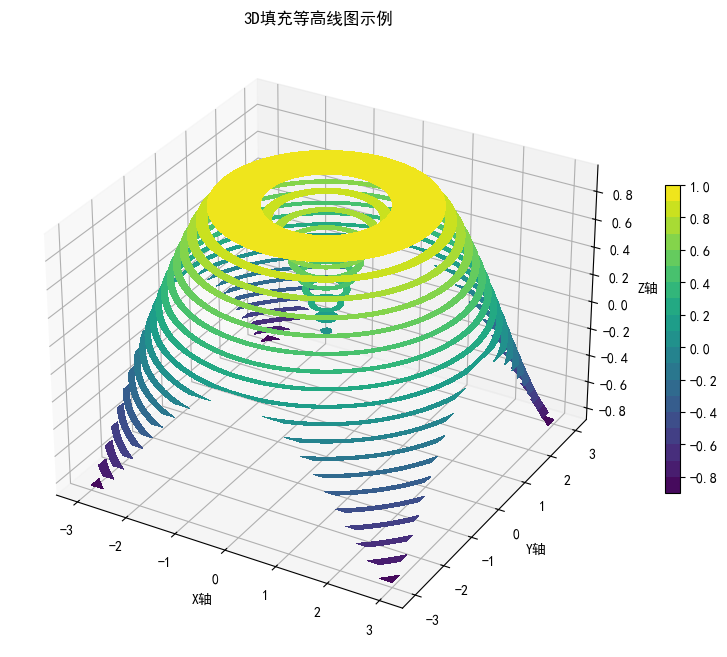

In [3]:
# 创建数据
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# 创建图形和3D坐标轴
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制填充等高线图
contour = ax.contourf(X, Y, Z, levels=20, cmap='viridis')

# 添加颜色条
plt.colorbar(contour, ax=ax, shrink=0.5, aspect=20)

ax.set_xlabel('X轴')
ax.set_ylabel('Y轴')
ax.set_zlabel('Z轴')
ax.set_title('3D填充等高线图示例')
plt.show()

# 2、使用示例：

### 示例 1：多方向投影

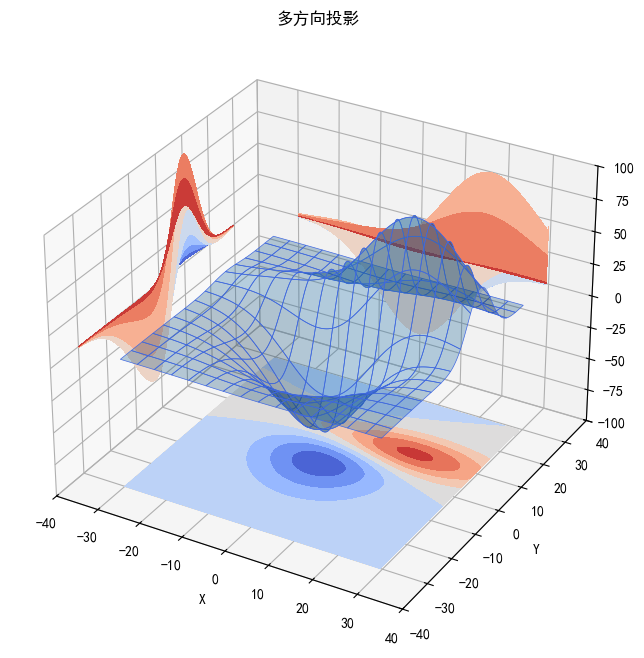

In [4]:
# 导入3D绘图工具包中的axes3d模块，用于生成测试数据和3D绘图
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# 生成测试数据：X, Y为网格坐标，Z为对应高度值
# 参数0.05控制数据密度，值越小网格越密集，图形越精细
X, Y, Z = axes3d.get_test_data(0.05)
# 绘制3D表面图，作为背景参考
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# 在Z轴方向添加等高线投影（沿Z轴切片）
# offset=-100表示等高线绘制在Z=-100的平面上
ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
# 在X轴方向添加等高线投影（沿X轴切片）
# offset=-40表示等高线绘制在X=-40的平面上
ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
# 在Y轴方向添加等高线投影（沿Y轴切片）
# offset=40表示等高线绘制在Y=40的平面上
ax.contourf(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')
ax.set_title('多方向投影')
plt.show()

### 示例 2：三维数据的截面可视化

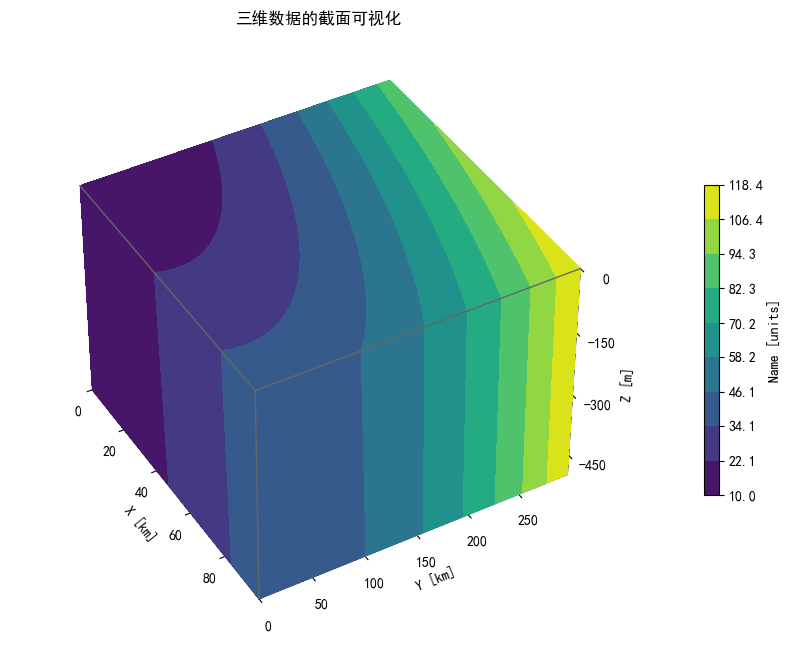

In [5]:
# 定义数据维度
Nx, Ny, Nz = 100, 300, 500
# 创建三维网格数据，注意Z轴使用负值使数据向下延伸
X, Y, Z = np.meshgrid(np.arange(Nx), np.arange(Ny), -np.arange(Nz))

# 生成模拟数据，基于坐标计算得到
data = (((X+100)**2 + (Y-20)**2 + 2*Z)/1000+1)

# 等高线图的公共参数设置
kw = {
    'vmin': data.min(),          # 颜色映射的最小值
    'vmax': data.max(),          # 颜色映射的最大值
    'levels': np.linspace(data.min(), data.max(), 10),  # 等高线的级别
}

# 创建带3D坐标轴的图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 在三个不同平面上绘制填充等高线图
# 1. 在z=0平面（x-y平面）上绘制
_ = ax.contourf(
    X[:, :, 0], Y[:, :, 0], data[:, :, 0],
    zdir='z', offset=0, **kw
)
# 2. 在y=0平面（x-z平面）上绘制
_ = ax.contourf(
    X[0, :, :], data[0, :, :], Z[0, :, :],
    zdir='y', offset=0, **kw
)
# 3. 在x=X.max()平面（y-z平面）上绘制
C = ax.contourf(
    data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)

# 设置坐标轴的显示范围
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# 绘制坐标轴边缘线，增强3D效果
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# 设置坐标轴标签和z轴刻度
ax.set(
    xlabel='X [km]',
    ylabel='Y [km]',
    zlabel='Z [m]',
    zticks=[0, -150, -300, -450],
)

# 调整视角和缩放比例
ax.view_init(40, -30, 0)  # 仰角40度，方位角-30度
ax.set_box_aspect(None, zoom=0.9)

# 添加颜色条
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Name [units]')

plt.title('三维数据的截面可视化')
plt.show()